In [13]:
from keras.datasets import boston_housing


In [14]:
(train_data,train_targets),(test_data,test_targets) =boston_housing.load_data()

In [23]:
test_data


array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10,input_dim=train_data.shape[1],activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                140       
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 40)                1240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1751 (6.84 KB)
Trainable params: 1751 (6.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [19]:
modelpath = '../data/model/boston-house.hdf5'
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                               verbose=0,save_best_only=True)

In [20]:
history = model.fit(train_data,train_targets,validation_split=0.25,epochs=2000,
                    batch_size=32,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
10/10 [==============================] - 1s 17ms/step - loss: 168.7543 - val_loss: 120.5467
Epoch 2/2000
10/10 [==============================] - 0s 5ms/step - loss: 88.7345 - val_loss: 98.0775
Epoch 3/2000
10/10 [==============================] - 0s 5ms/step - loss: 64.5331 - val_loss: 96.8869
Epoch 4/2000
10/10 [==============================] - 0s 5ms/step - loss: 60.0671 - val_loss: 99.7779
Epoch 5/2000
10/10 [==============================] - 0s 5ms/step - loss: 58.2355 - val_loss: 97.3288
Epoch 6/2000
10/10 [==============================] - 0s 5ms/step - loss: 57.6497 - val_loss: 99.9575
Epoch 7/2000
10/10 [==============================] - 0s 7ms/step - loss: 55.4763 - val_loss: 92.8033
Epoch 8/2000
10/10 [==============================] - 0s 5ms/step - loss: 56.0088 - val_loss: 99.5528
Epoch 9/2000
10/10 [==============================] - 0s 5ms/step - loss: 55.0600 - val_loss: 93.9630
Epoch 10/2000
10/10 [==============================] - 0s 5ms/step - loss: 54.2

In [21]:
real_prices = []
pred_prices = []
X_num = []
n_iter = 0
Y_prediction = model.predict(test_data).flatten()
for i in range(25):
    real = test_targets[i]
    prediction = Y_prediction[i]
    print('실제가격 : {:2f}, 예상가격: {:2f}'.format(real,prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter +1
    X_num.append(n_iter)

4/4 [==============================] - 0s 0s/step
실제가격 : 7.200000, 예상가격: 13.314734
실제가격 : 18.800000, 예상가격: 20.470606
실제가격 : 19.000000, 예상가격: 21.265192
실제가격 : 27.000000, 예상가격: 35.651760
실제가격 : 22.200000, 예상가격: 24.629158
실제가격 : 24.500000, 예상가격: 22.435226
실제가격 : 31.200000, 예상가격: 30.197824
실제가격 : 22.900000, 예상가격: 23.504816
실제가격 : 20.500000, 예상가격: 20.100080
실제가격 : 23.200000, 예상가격: 18.311296
실제가격 : 18.600000, 예상가격: 11.953944
실제가격 : 14.500000, 예상가격: 17.128307
실제가격 : 17.800000, 예상가격: 16.430552
실제가격 : 50.000000, 예상가격: 31.794563
실제가격 : 20.800000, 예상가격: 19.797180
실제가격 : 24.300000, 예상가격: 23.137955
실제가격 : 24.200000, 예상가격: 23.690964
실제가격 : 19.800000, 예상가격: 21.889420
실제가격 : 19.100000, 예상가격: 17.807457
실제가격 : 22.700000, 예상가격: 25.353369
실제가격 : 12.000000, 예상가격: 13.503742
실제가격 : 10.200000, 예상가격: 15.513827
실제가격 : 20.000000, 예상가격: 20.507595
실제가격 : 18.500000, 예상가격: 17.492619
실제가격 : 20.900000, 예상가격: 22.674540


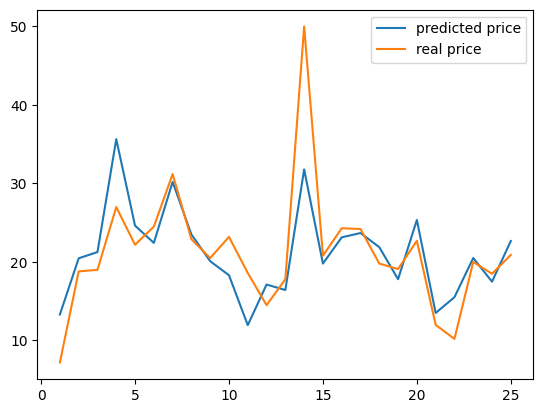

In [22]:
import matplotlib.pyplot as plt
plt.plot(X_num,pred_prices,label='predicted price')
plt.plot(X_num,real_prices,label='real price')
plt.legend()
plt.show()